In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os,sys
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs
import orjson
import seaborn as sns

In [22]:
%matplotlib inline

In [23]:
def load_configfn(configfn):
    with open(configfn, 'rb') as f:
        config = orjson.loads(f.read())
    return config

In [24]:
configfn = "../config_zinc22_db.json"
config = load_configfn(configfn)
datadir = config["result_path"]
project_name = config["project_name"]

In [25]:
def get_top_all_iter(i_iter, ntop):
    df_all = None
    for i in range(1, i_iter+1):
        infn = os.path.join(datadir, f"{project_name}_train{i}_vs_results.aug.feather")
        df = pd.read_feather(infn)
        df['i_iter'] = [i]*len(df)
        if df_all is None:
            df.sort_values(by='dG', inplace=True)
            df_all = df[:ntop]
        else:
            df.sort_values(by='dG', inplace=True)
            df_all = pd.concat([df_all, df[:ntop]], ignore_index=True)
    df_all.sort_values(by='dG', inplace=True)
    return df_all[:ntop]

In [26]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [27]:
plt.style.use('seaborn-v0_8-bright')

In [28]:
bins = np.arange(-30, -10, 1)
ntop = 100

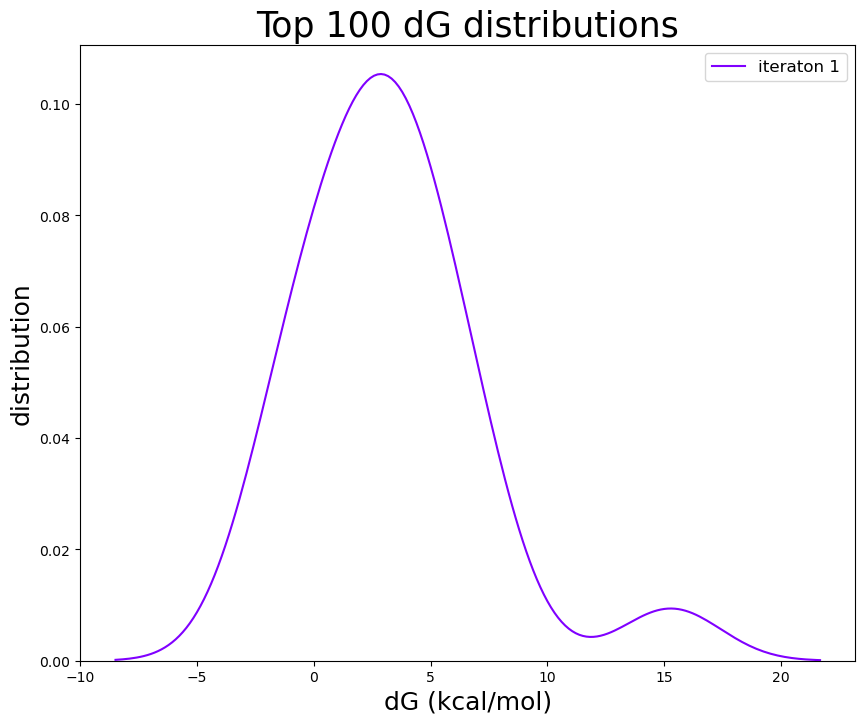

In [29]:
score_column='dG'
cmap = plt.get_cmap('rainbow')
n_iters = 7
colors = [cmap(i) for i in np.linspace(0, 1, n_iters)] 
plt.figure(figsize=(10,8))
config = load_configfn(configfn)
datadir = config["train_data_path"]
max_iter=15
i_iters = list(range(1,n_iters+1))
for i_iter in i_iters:
    infn = os.path.join(datadir, f"{project_name}_train{i_iter}_vs_results.aug.feather")
    if not os.path.exists(infn):
        continue
    df = get_top_all_iter(i_iter, ntop=ntop)
    sns.kdeplot(df[:ntop][score_column],label=f"iteraton {i_iter}", color=colors[i_iter-1], linewidth=1.5)

plt.xlabel('dG (kcal/mol)', fontsize=18)
plt.ylabel('distribution', fontsize=18)
plt.title(f"Top {ntop} dG distributions", fontsize=25)

plt.legend(fontsize=12)
plt.savefig(f"dG_vs_iteration_{ntop}.{project_name}.png", dpi=300)

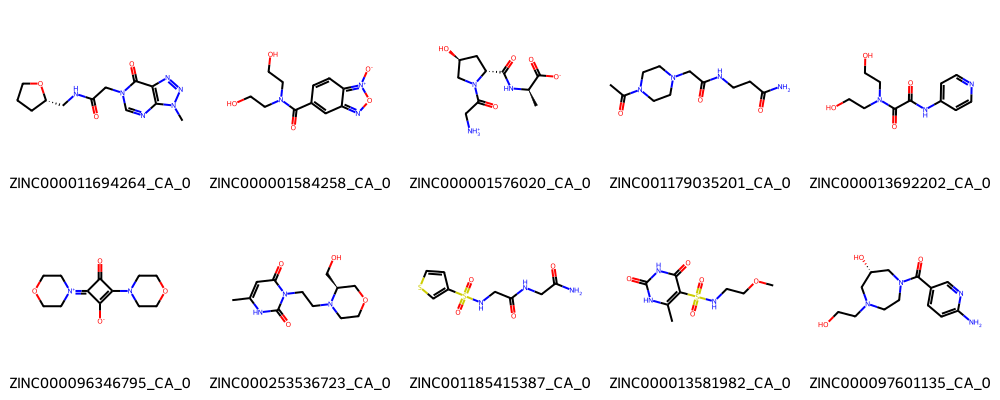

<Figure size 640x480 with 0 Axes>

In [30]:
mols = [Chem.MolFromSmiles(smi) for smi in df['smiles']]
plt.tight_layout()
labels = list( df['ligandname'][:10] )
Chem.Draw.MolsToGridImage(mols[:10], molsPerRow=5, legends=labels, subImgSize=(200, 200))

In [31]:
df.head()

,zincid,score,complexscore,dG,ligandname,description,smiles,fp_binary,i_iter
13,ZINC000011694264,-37.433,-37.433,-2.110,ZINC000011694264_CA_0,Nav_5EK0_0_2.VSD-5EK0.lig_0001_0001_0001,Cn1nnc2c1ncn(CC(=O)NC[C@@H]1CCCO1)c2=O,b'\xe0\xff\xff\xff\x00\x04\x00\x00+\x00\x00\x0...,1
10,ZINC000001584258,-37.393,-37.393,-1.210,ZINC000001584258_CA_0,Nav_5EK0_0_1.VSD-5EK0.lig_0001_0001_0002,O=C(c1ccc2c(c1)no[n+]2[O-])N(CCO)CCO,b'\xe0\xff\xff\xff\x00\x04\x00\x00\x1f\x00\x00...,1
6,ZINC000001576020,-29.531,-29.531,-1.120,ZINC000001576020_CA_0,Nav_5EK0_0_3.VSD-5EK0.lig_0001_0001_0004,C[C@@H](NC(=O)[C@H]1C[C@H](O)CN1C(=O)C[NH3+])C...,b'\xe0\xff\xff\xff\x00\x04\x00\x00 \x00\x00\x0...,1
15,ZINC001179035201,-37.420,-37.420,0.132,ZINC001179035201_CA_0,Nav_5EK0_0_2.VSD-5EK0.lig_0001_0001_0002,CC(=O)N1CCN(CC(=O)NCCC(N)=O)CC1,b'\xe0\xff\xff\xff\x00\x04\x00\x00\x1a\x00\x00...,1
1,ZINC000013692202,-32.877,-32.877,0.251,ZINC000013692202_CA_0,Nav_5EK0_0_1.VSD-5EK0.lig_0001_0001_0003,O=C(Nc1ccncc1)C(=O)N(CCO)CCO,b'\xe0\xff\xff\xff\x00\x04\x00\x00\x1c\x00\x00...,1
